#ED-X Dashboard Backend(EDA)⛏:
This is a Jupyter Notebook file that features the exploratory data analysis (EDA) steps taken to create the CSV files and SQL queries that fuel the Udemy Dashboard. The tools used include Python and SQL Lite.

In [33]:
import sqlite3
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
edx_FILEPATH = "G:\CODE_playground\data_warehouse\KAGGLE\MOOC data (udemy vs. edx)\edx_courses.csv"
edx_courses = pd.read_csv(edx_FILEPATH)
edx_courses.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",NaN,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part two of the MathTrackX XSer...,NaN,https://www.edx.org/course/mathtrackx-special-...


In [35]:
edx_courses.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

## Data Cleaning

In [36]:
# sum of null values in every column
edx_courses.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [37]:
# clean 'price' column
edx_courses['price'] = edx_courses['price'].str.replace('FREE-Add a Verified Certificate for ', '')
edx_courses['price'] = edx_courses['price'].str.replace('$', '')
edx_courses['price'] = edx_courses['price'].str.replace(' USD', '')
edx_courses['price'] = edx_courses['price'].astype(float)
edx_courses['price']

<ipython-input-37-8add241d36b6>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  edx_courses['price'] = edx_courses['price'].str.replace('$', '')


0       49.0
1       49.0
2       90.0
3      199.0
4      249.0
       ...  
970     25.0
971    139.0
972    139.0
973     25.0
974     79.0
Name: price, Length: 975, dtype: float64

In [38]:
# clean 'n_enrolled' column
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',', '')
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].fillna(0)
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].astype(int)
edx_courses['n_enrolled'].head()

0     124980
1     293864
2    2442271
3     129555
4      81140
Name: n_enrolled, dtype: int32

In [39]:
# clean 'course_length' column
edx_courses['course_length'] = edx_courses['course_length'].str.replace('Weeks', '')
edx_courses['course_length'] = edx_courses['course_length'].astype(int)
edx_courses['course_length'].head()

0     2
1     7
2    12
3    13
4     4
Name: course_length, dtype: int32

In [40]:
# fill null values
edx_courses['summary'] = edx_courses['summary'].fillna('Unlisted')
edx_courses['instructors'] = edx_courses['instructors'].fillna('Unlisted')
edx_courses['subtitles'] = edx_courses['subtitles'].fillna('English')
edx_courses['course_description'] = edx_courses['course_description'].fillna('Unlisted')
edx_courses['course_syllabus'] = edx_courses['course_syllabus'].fillna('Unlisted')

In [41]:
# sum of null values in every column(after filling)
edx_courses.isna().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_syllabus       0
course_url            0
dtype: int64

In [42]:
edx_courses.dtypes

title                  object
summary                object
n_enrolled              int32
course_type            object
institution            object
instructors            object
Level                  object
subject                object
language               object
subtitles              object
course_effort          object
course_length           int32
price                 float64
course_description     object
course_syllabus        object
course_url             object
dtype: object

## Data transformation

In [43]:
# establish categories used in column: ['Advanced', 'Intermediate', 'Introductory']
edx_courses['Level'] = edx_courses['Level'].astype('category')
print(edx_courses['Level'].value_counts())
print()

# transform categories to numerical values
edx_courses['Level'] = edx_courses['Level'].cat.codes
print(edx_courses['Level'].value_counts())

Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

2    621
1    267
0     87
Name: Level, dtype: int64


In [44]:
# establish categories used in column: ['Instructor-led on a course schedule', 'Self-paced on your time']
edx_courses['course_type'] = edx_courses['course_type'].astype('category')
print(edx_courses['course_type'].value_counts())
print()

# transform categories to numerical values
edx_courses['course_type'] = edx_courses['course_type'].cat.codes
print(edx_courses['course_type'].value_counts())

Self-paced on your time                917
Instructor-led on a course schedule     58
Name: course_type, dtype: int64

1    917
0     58
Name: course_type, dtype: int64


In [46]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               975 non-null    object 
 1   summary             975 non-null    object 
 2   n_enrolled          975 non-null    int32  
 3   course_type         975 non-null    int8   
 4   institution         975 non-null    object 
 5   instructors         975 non-null    object 
 6   Level               975 non-null    int8   
 7   subject             975 non-null    object 
 8   language            975 non-null    object 
 9   subtitles           975 non-null    object 
 10  course_effort       975 non-null    object 
 11  course_length       975 non-null    int32  
 12  price               975 non-null    float64
 13  course_description  975 non-null    object 
 14  course_syllabus     975 non-null    object 
 15  course_url          975 non-null    object 
dtypes: float

In [45]:
edx_courses.describe()

,n_enrolled,course_type,Level,course_length,price
count,9.750000e+02,975.000000,975.000000,975.000000,975.000000
mean,4.670523e+04,0.940513,1.547692,6.705641,100.465497
std,1.128239e+05,0.236656,0.653165,3.150327,69.572175
min,0.000000e+00,0.000000,0.000000,1.000000,5.000000
25%,8.529500e+03,1.000000,1.000000,4.000000,49.000000
50%,1.968700e+04,1.000000,2.000000,6.000000,79.000000
75%,4.891850e+04,1.000000,2.000000,8.000000,149.000000
max,2.442271e+06,1.000000,2.000000,18.000000,450.000000


Now the whole dataset is cleaned and even.

In [30]:
# subjects with the most courses in edx(in ascending order)
edx_courses['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Medicine                         31
Math                             31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Science                          10
Law                              10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Philosophy & Ethics               6
Food & Nutrition                  6
Architecture                      5
Chemistry                   

In [31]:
# export the cleaned dataset(edx_courses) to a csv file
edx_courses_clean = edx_courses.to_csv("edx_courses_clean.csv")

# SQL implementation

In this section, I have created a database to dump the data and use queries to access and manipulate it.

*The advantage of utilizing SQL with Pandas is the ease of generating dataframe tables using SQL queries.*

In [29]:
try:
    Path('edx_courses.db').unlink() # delete file if it exists (For test purposes)

except FileNotFoundError:
    # create db file
    Path('edx_courses.db').touch()
    print("Database created successfully!")

Database created successfully!


In [32]:
# connect to database
edx_conn = sqlite3.connect('edx_courses.db')
edx_cursor = edx_conn.cursor()

# Write records stored in a DataFrame to a SQL database
edx_courses.to_sql('edx_courses', edx_conn, if_exists='replace', index=False)

# Read SQL query or database table into a DataFrame
edx_courses_init_query = pd.read_sql(
    '''
    SELECT * from edx_courses
    ''', edx_conn
)

edx_courses_init_query.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,1,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,2,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,1,The University of Michigan,Charles Severance,2,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted,https://www.edx.org/course/cs50s-introduction-...


In [ ]:
data_analysis_query = pd.read_sql('''SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_courses
                                     WHERE subject == 'Data Analysis & Statistics'
                                     ORDER BY price DESC LIMIT 15''', edx_conn)
data_analysis_query

,title,price,course_effort,n_enrolled,institution
0,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
1,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
2,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
3,Probability - The Science of Uncertainty and Data,300.0,10–14 hours per week,205615,Massachusetts Institute of Technology
4,Statistics and R,249.0,2–4 hours per week,314586,Harvard University
5,Data Analytics and Visualization in Health Care,249.0,8–10 hours per week,7304,Rochester Institute of Technology
6,The Analytics Edge,199.0,10–15 hours per week,129555,Massachusetts Institute of Technology
7,"Data Science for Construction, Architecture an...",199.0,4–6 hours per week,11113,The National University of Singapore
8,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
9,Image Processing and Analysis for Life Scientists,199.0,2–3 hours per week,8621,École polytechnique fédérale de Lausanne


Research Q1:
##   What is the price/value of particular subjects in edx?

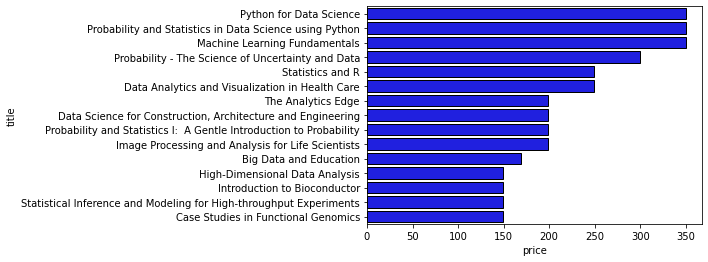

In [ ]:
sns.barplot(x='price', y='title', data=data_analysis_query, color='blue', edgecolor='black')

Research Q2:
##   What subjects are critically acclaimed in edx?

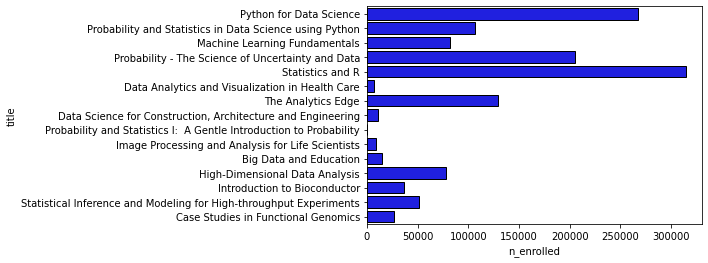

In [ ]:
sns.barplot(x='n_enrolled', y='title', data=data_analysis_query, color='blue', edgecolor='black')

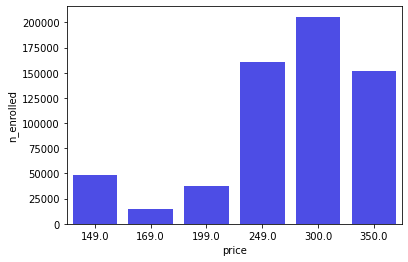

In [ ]:
sns.barplot(x='price', y='n_enrolled', data=data_analysis_query, color='blue', alpha=0.8, ci=False)

In [ ]:
data_analysis_query.mean()

<ipython-input-56-2abba0eae07c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_analysis_query.mean()


price           227.266667
n_enrolled    89348.533333
dtype: float64

### NOTE:- 

The above analysis is based of from a sample of 15 instances pulled from the database.

# ANALYSIS OF PYTHON COURSES

In [ ]:
data_analysis_python = pd.read_sql('''SELECT title, price, course_effort, n_enrolled, institution
                                      FROM edx_courses
                                      WHERE title LIKE '%Python'
                                      ORDER BY price DESC''', edx_conn)
data_analysis_python

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
1,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
2,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
3,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"
4,Estructuras de Datos con Python,49.0,2–4 hours per week,0,The University of Michigan
5,Advanced Algorithmics and Graph Theory with Py...,49.0,2–4 hours per week,13502,IMT
6,Analyzing Data with Python,39.0,2–4 hours per week,94079,IBM
7,Visualizing Data with Python,39.0,2–4 hours per week,42101,IBM


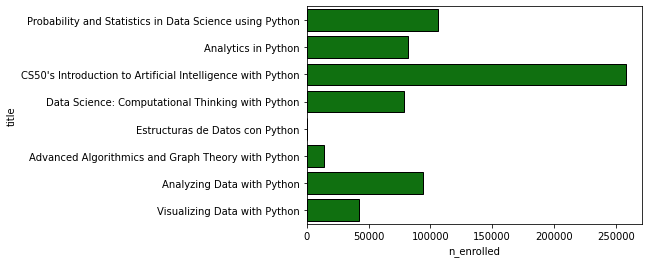

In [ ]:
sns.barplot(x='n_enrolled', y='title', data=data_analysis_python, color='green', edgecolor='black')

As you can tell from the above diagram, the Spanish course did not have any enrolments due to the language barrier experienced. Or it might also mean that no Spanish-speaking individuals found or rather considered paying for it.

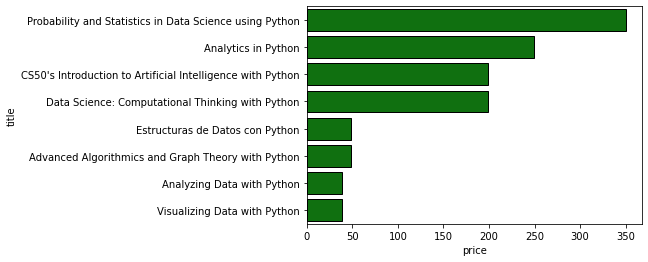

In [ ]:
sns.barplot(x='price', y='title', data=data_analysis_python, color='green', edgecolor='black')

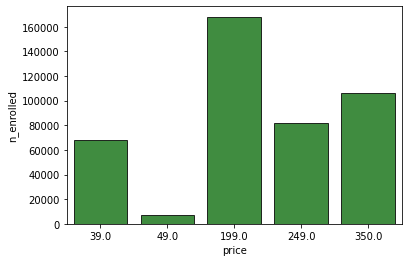

In [ ]:
sns.barplot(x='price', y='n_enrolled', data=data_analysis_python, color='green', edgecolor='black', alpha=0.8, ci=False)

In [ ]:
data_analysis_programming = pd.read_sql('''SELECT title, price, course_effort, n_enrolled, institution
                                           FROM edx_courses
                                           WHERE title LIKE '%Programming'
                                           ORDER BY price DESC''', edx_conn)
data_analysis_programming

,title,price,course_effort,n_enrolled,institution
0,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
1,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
2,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
3,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM


In [ ]:
data_analysis_statistics = pd.read_sql('''SELECT title, price, course_effort, n_enrolled, institution
                                          FROM edx_courses
                                          WHERE title LIKE '%Statistics'
                                          ORDER BY price DESC''', edx_conn)
data_analysis_statistics

,title,price,course_effort,n_enrolled,institution
0,BioStatistics,79.0,5–10 hours per week,14937,Doane University
1,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
2,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
3,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund


In [ ]:
data_analysis_probability = pd.read_sql('''SELECT title, price, course_effort, n_enrolled, institution
                                           FROM edx_courses
                                           WHERE title LIKE '%Probability' AND title NOT LIKE '%MathTrackX: Probability'
                                           ORDER BY price DESC''', edx_conn)
data_analysis_probability

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
1,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
2,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
3,Data Science: Probability,49.0,1–2 hours per week,135859,Harvard University


## SUBJECT: COMPUTER SCIENCE

In [ ]:
comp_sci_query = pd.read_sql('''SELECT title, price, course_effort, n_enrolled, institution
                                FROM edx_courses
                                WHERE subject = 'Computer Science'
                                ORDER BY price DESC LIMIT 15''', edx_conn)
comp_sci_query

,title,price,course_effort,n_enrolled,institution
0,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
1,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
2,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
3,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University
4,Scripting and Programming Foundations,299.7,9–10 hours per week,0,Western Governors University
5,Cloud Computing for Enterprises,299.0,8–10 hours per week,27241,University System of Maryland-University of Ma...
6,Marketing Analytics: Marketing Measurement Str...,249.0,5–7 hours per week,81140,"University of California, Berkeley"
7,Marketing Analytics: Competitive Analysis and ...,249.0,5–7 hours per week,70682,"University of California, Berkeley"
8,Artificial Intelligence (AI),249.0,8–10 hours per week,265104,Columbia University
9,Machine Learning,249.0,8–10 hours per week,150855,Columbia University
